In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
import matplotlib
print('Matplotlib version:', matplotlib.__version__)
import scipy
import sklearn
print('SciPy version :', scipy.__version__)
print('Scikit-learn version :', sklearn.__version__)

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
import warnings

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2
Matplotlib version: 3.9.0
SciPy version : 1.11.4
Scikit-learn version : 1.2.2


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load Data

In [4]:
df = pd.read_csv('flight.csv')
df = pd.DataFrame(df)
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER WORK_CITY  \
71         58088  10/19/2009        10/22/2009   Male         6  shenzhen   
18983      26639   3/12/2006         3/12/2006   Male         4    dalian   
12907      43717  11/12/2009        11/12/2009   Male         4  shanghai   
20466      38528   7/28/2007         1/24/2008   Male         4    MANILA   
57176      34049   11/2/2012         11/2/2012   Male         4   beijing   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
71        guangdong           CN  55.0  3/31/2014  ...  115130.0      137636   
18983      liaoning           CN  56.0  3/31/2014  ...    1066.0       13476   
12907      shanghai           CN  41.0  3/31/2014  ...    4292.0       24518   
20466           NaN           PH  64.0  3/31/2014  ...       0.0       19436   
57176       beijing           CN  46.0  3/31/2014  ...     513.0        6750   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
71            3/13/2014           19     11.126984           47   
18983         6/12/2013          294     20.105263          122   
12907         3/13/2014           19     32.000000          238   
20466         2/22/2013          404     29.090909          133   
57176         5/13/2013          324     96.000000          176   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
71                  9      1.236257      202596               14  
18983               0      0.956132       11054                0  
12907               0      0.736905       19601                7  
20466               0      0.615569        7548                0  
57176               0      0.250000           0                0  

[5 rows x 23 columns]

In [5]:
# Periksa nilai unik di setiap kolom
unique_values = df.nunique()
print("\nNumber of unique values in each column:")
print(unique_values)


Number of unique values in each column:
MEMBER_NO            62988
FFP_DATE              3068
FIRST_FLIGHT_DATE     3406
GENDER                   2
FFP_TIER                 3
WORK_CITY             3234
WORK_PROVINCE         1165
WORK_COUNTRY           118
AGE                     84
LOAD_TIME                1
FLIGHT_COUNT           153
BP_SUM               23449
SUM_YR_1             15828
SUM_YR_2             16767
SEG_KM_SUM           29081
LAST_FLIGHT_DATE       731
LAST_TO_END            731
AVG_INTERVAL         10706
MAX_INTERVAL           706
EXCHANGE_COUNT          28
avg_discount         54179
Points_Sum           25062
Point_NotFlight         99
dtype: int64


# Describe Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [7]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['FFP_TIER'] = df['FFP_TIER'].astype(object)

In [10]:
# Separate numerical and  categorical features
numerical = ['MEMBER_NO', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 
             'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 
             'Points_Sum', 'Point_NotFlight']
categorical = ['FFP_DATE', 'FFP_TIER', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 
               'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']


In [11]:
# Describe numerical features
df[numerical].describe()

MEMBER_NO           AGE  FLIGHT_COUNT         BP_SUM       SUM_YR_1  \
count  62988.000000  62568.000000  62988.000000   62988.000000   62437.000000   
mean   31494.500000     42.476346     11.839414   10925.081254    5355.376064   
std    18183.213715      9.885915     14.049471   16339.486151    8109.450147   
min        1.000000      6.000000      2.000000       0.000000       0.000000   
25%    15747.750000     35.000000      3.000000    2518.000000    1003.000000   
50%    31494.500000     41.000000      7.000000    5700.000000    2800.000000   
75%    47241.250000     48.000000     15.000000   12831.000000    6574.000000   
max    62988.000000    110.000000    213.000000  505308.000000  239560.000000   

            SUM_YR_2     SEG_KM_SUM   LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
count   62850.000000   62988.000000  62988.000000  62988.000000  62988.000000   
mean     5604.026014   17123.878691    176.120102     67.749788    166.033895   
std      8703.364247   20960.844623    183.822223     77.517866    123.397180   
min         0.000000     368.000000      1.000000      0.000000      0.000000   
25%       780.000000    4747.000000     29.000000     23.370370     79.000000   
50%      2773.000000    9994.000000    108.000000     44.666667    143.000000   
75%      6845.750000   21271.250000    268.000000     82.000000    228.000000   
max    234188.000000  580717.000000    731.000000    728.000000    728.000000   

       EXCHANGE_COUNT  avg_discount   Points_Sum  Point_NotFlight  
count    62988.000000  62988.000000   62988.0000     62988.000000  
mean         0.319775      0.721558   12545.7771         2.728155  
std          1.136004      0.185427   20507.8167         7.364164  
min          0.000000      0.000000       0.0000         0.000000  
25%          0.000000      0.611997    2775.0000         0.000000  
50%          0.000000      0.711856    6328.5000         0.000000  
75%          0.000000      0.809476   14302.5000         1.000000  
max         46.000000      1.500000  985572.0000       140.000000

In [12]:
# Describe categorical features
df[categorical].describe()

FFP_DATE  FFP_TIER FIRST_FLIGHT_DATE GENDER  WORK_CITY WORK_PROVINCE  \
count       62988     62988             62988  62985      60719         59740   
unique       3068         3              3406      2       3234          1165   
top     1/13/2011         4         2/16/2013   Male  guangzhou     guangdong   
freq          184     58066                96  48134       9386         17509   

       WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
count         62962      62988            62988  
unique          118          1              731  
top              CN  3/31/2014        3/31/2014  
freq          57748      62988              959

## Insights: <br>
1. Dataset terdiri dari 22 kolom dan 62,988 baris.
2. Terdapat nilai null pada 7 kolom.
3. Tidak terdapat duplikat pada data.
4. MEMBER_NO dan avg_discount memiliki distribusi normal, sedangkan kolom lainnya menunjukkan distribusi positive skewed (Mean > Median).
5. Terdapat anomali pada kolom AGE dengan maksimal usia 110 tahun.
6. GENDER didominasi oleh Male/laki-laki sebanyak 48,134.
7. WORK_COUNTRY didominasi oleh CN (Cina), WORK_PROVINCE terbanyak adalah Guangdong, dan WORK_CITY terbanyak adalah Guangzhou.
8. Kolom FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE seharusnya tipe datanya adalah DateTime bukan Object
9. Terdapat terlalu banyak unique values pada fitur kategorikal WORK_CITY, WORK_PROVINCE, dan WORK_COUNTRY sehingga kemungkinan fitur-fitur ini bukan kandidat yang baik untuk clstering. 

# Univariate Analysis

#### Numerical features

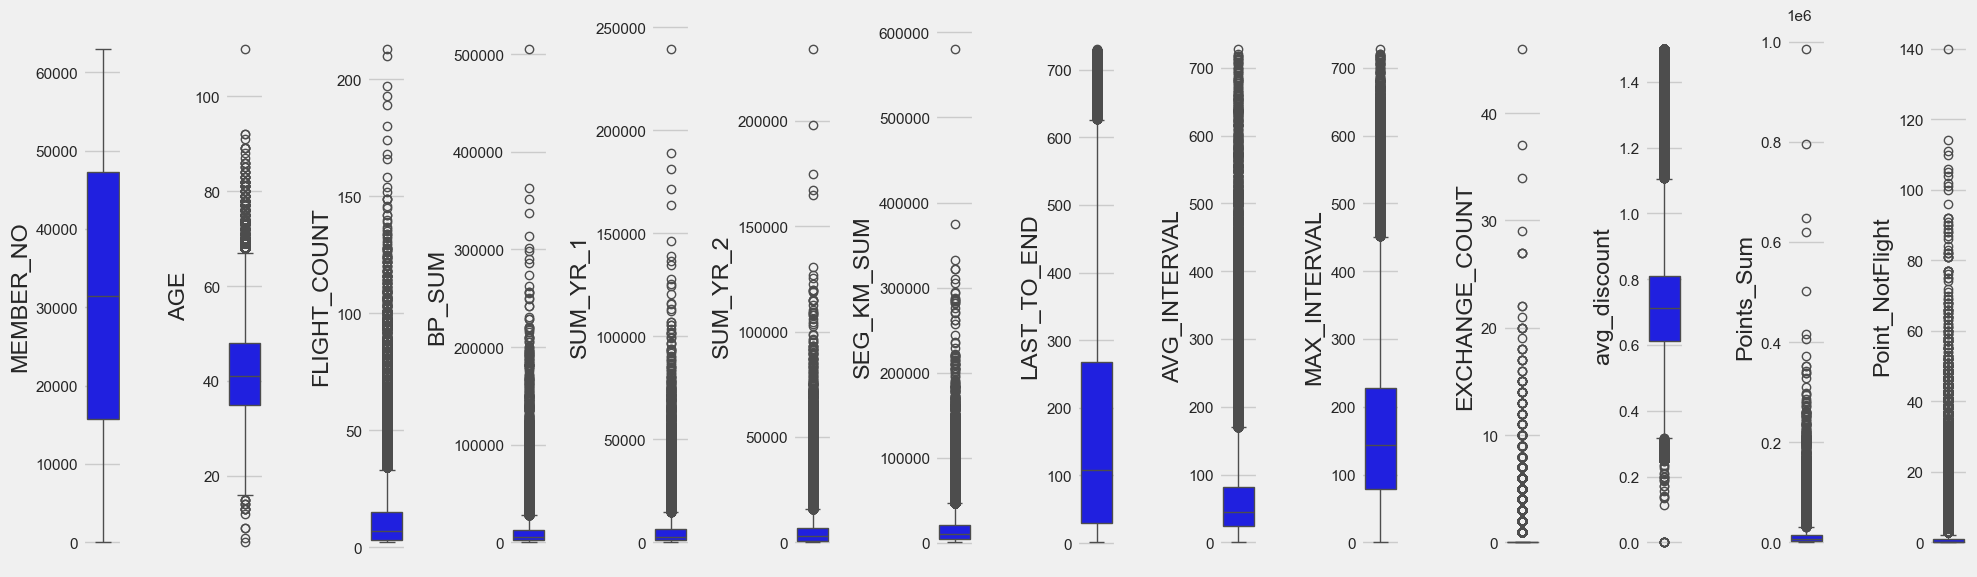

In [13]:
# Create boxplot to see outliers
plt.figure(figsize=(20, 6))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]], color='blue', orient='v')
    plt.tight_layout()


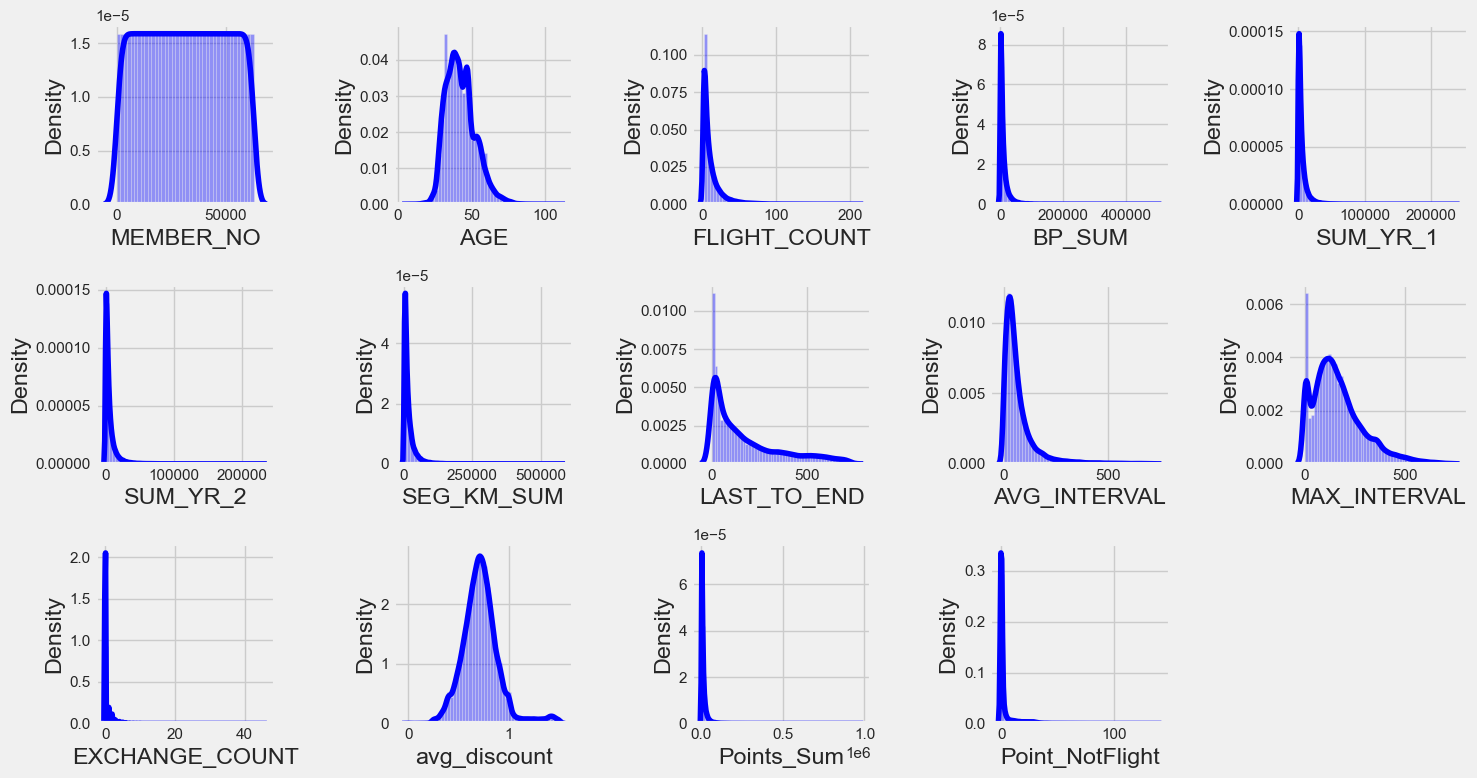

In [14]:
# Create distplot to see distribution
plt.figure(figsize=(15, 8))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[numerical[i]], color = 'blue')
    plt.tight_layout()
plt.show()

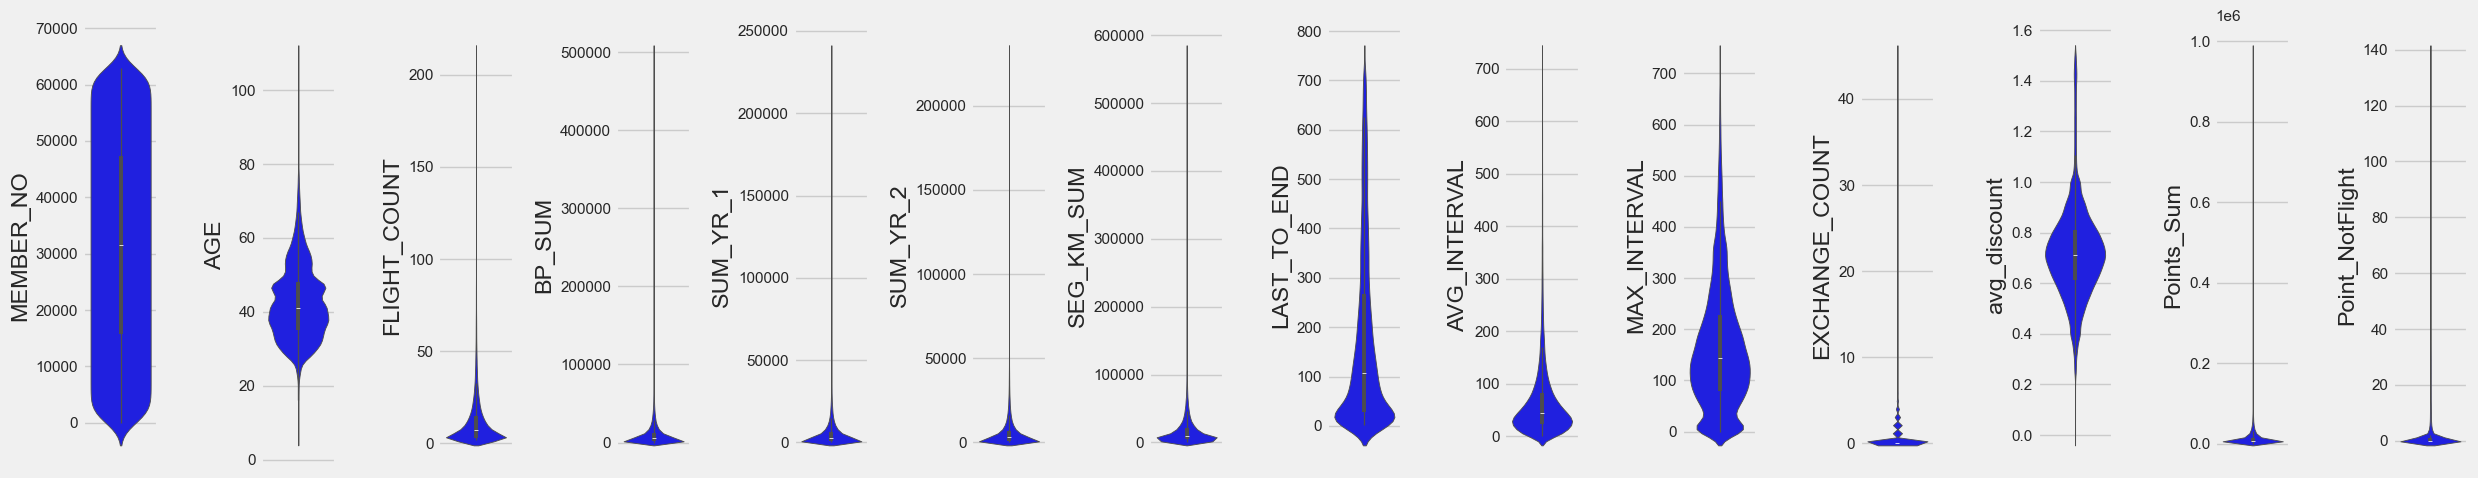

In [15]:
# Create violinplot to see outliers and distrubution
plt.figure(figsize=(25, 5))
for i in range (0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.violinplot(y=df[numerical[i]], color='blue', orient='v')
    plt.tight_layout()

<b>Insight:<b> <br>
1. MEMBER_NO memiliki unique values sebanyak jumlah baris sehingga kolom ini tidak akan dipakai selanjutnya.
2. Distribusi pada kolom FFP_TIER mengindikasikan bahwa fitur ini merupakan fitur kategorikal.
3. Kolom AGE dan avg_discount emmiliki distribusi data yang normal, sedangkan kolom lainya yang belum disebutkan diatas terlihat memiliki distribusi positive skewed.


#### Categorical features

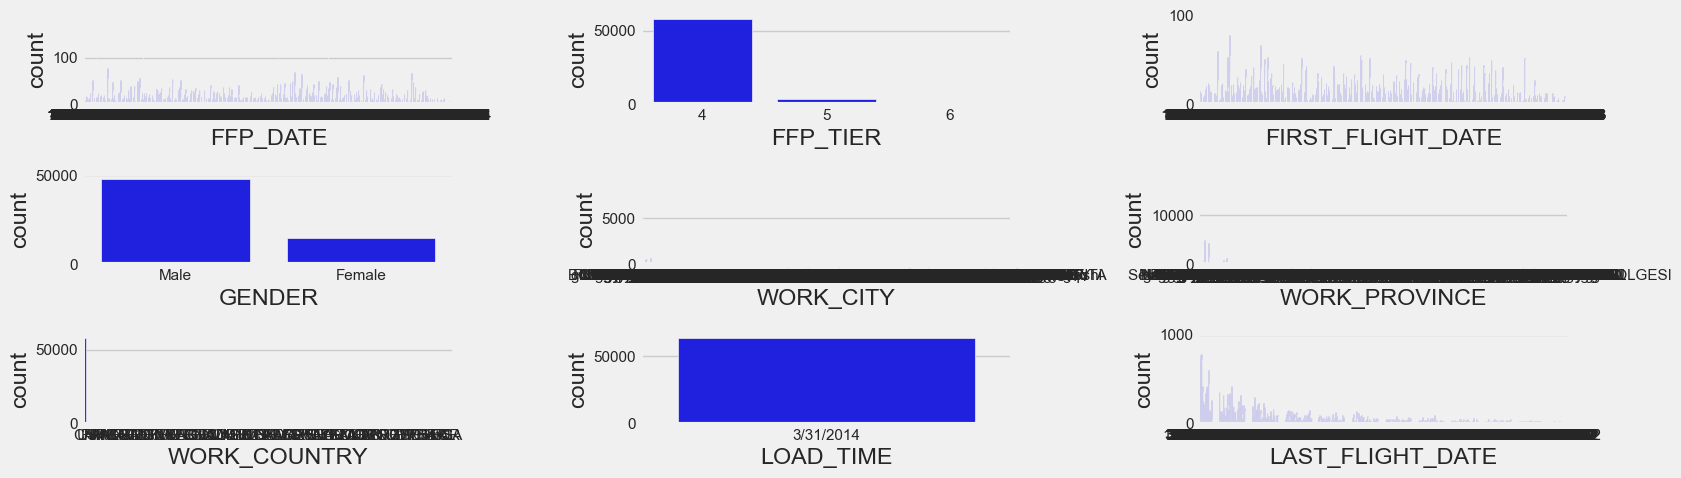

In [16]:
# Create count plot to see data distribution
plt.figure(figsize=(17,5))
for i in range(len(categorical)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical[i]], color="blue")
plt.tight_layout()
plt.show()

<b>Insight:<b> <br>
1. Kolom GENDER dimana Male terlihat sangat mendominasi. <br>
2. Tidak banyak informasi yang bisa ditangkap dari kolom lainya oleh karena itu harus dikerucutkan menjadi top 10 untuk mendapatkan insight..

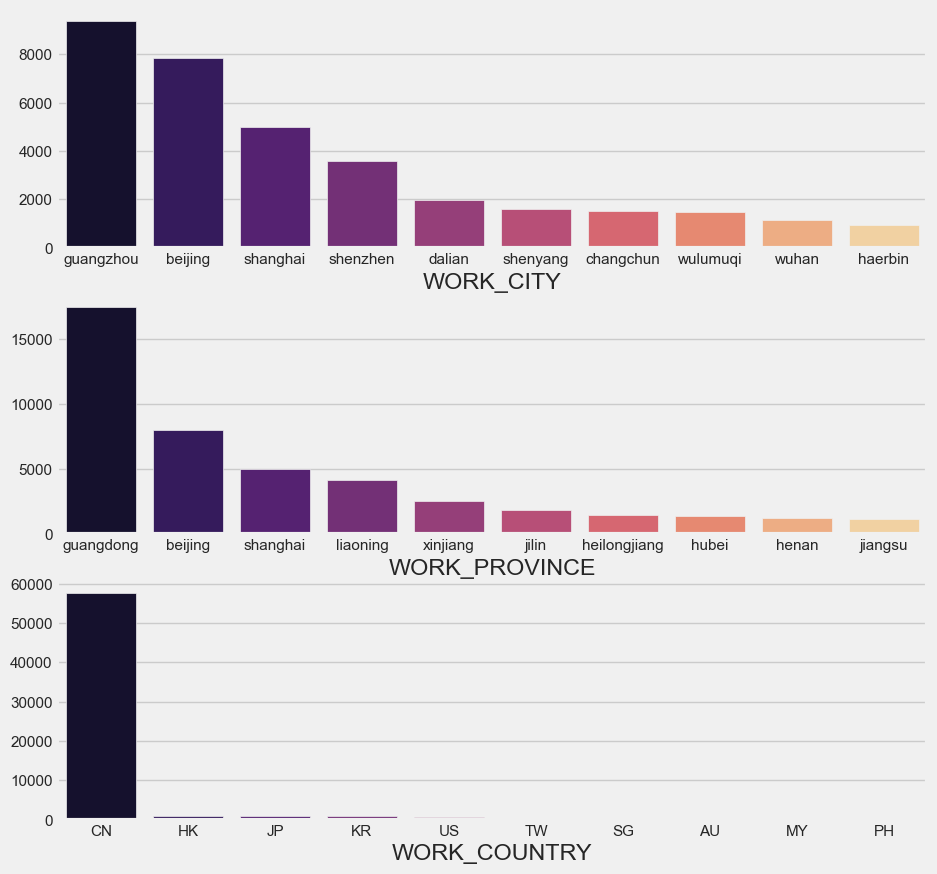

In [17]:
# Top 10 values from WORK_CITY, WORK_PROVINCE, and WORK_COUNTRY
workcity = df["WORK_CITY"].value_counts().head(10)
workprovince = df["WORK_PROVINCE"].value_counts().head(10)
workcountry = df["WORK_COUNTRY"].value_counts().head(10)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.barplot(x=workcity.index, y = workcity.values, ax=ax[0], palette="magma")
sns.barplot(x=workprovince.index, y = workprovince.values, ax=ax[1], palette="magma")
sns.barplot(x=workcountry.index, y = workcountry.values, ax=ax[2], palette="magma")
plt.show()

In [18]:
# Function to check if conversion to datetime is possible for "FFP_DATE", "FIRST_FLIGHT_DATE", and "LAST_FLIGHT_DATE
def check_date_format(column):
    try:
        pd.to_datetime(column, errors='raise')
        return True
    except (ValueError, TypeError):
        return False


# Check each date column for invalid formats
date_columns = ["FFP_DATE", "FIRST_FLIGHT_DATE", "LAST_FLIGHT_DATE"]
errors = {col: check_date_format(df[col]) for col in date_columns}

# Print results and identify invalid date formats
invalid_rows = []
for col, is_valid in errors.items():
    if not is_valid:
        print(f"Column '{col}' contains invalid date formats.")
        invalid_rows.extend(df[~df[col].apply(lambda x: check_date_format(pd.Series([x])))].index)

Column 'LAST_FLIGHT_DATE' contains invalid date formats.


In [19]:
# Drop rows with invalid date formats
if invalid_rows:
    df = df.drop(index=invalid_rows).reset_index(drop=True)
    print(f"Dropped {len(invalid_rows)} rows with invalid date formats.")
else:
    df_cleaned = df.copy()
    print("No invalid date formats found.")

Dropped 421 rows with invalid date formats.


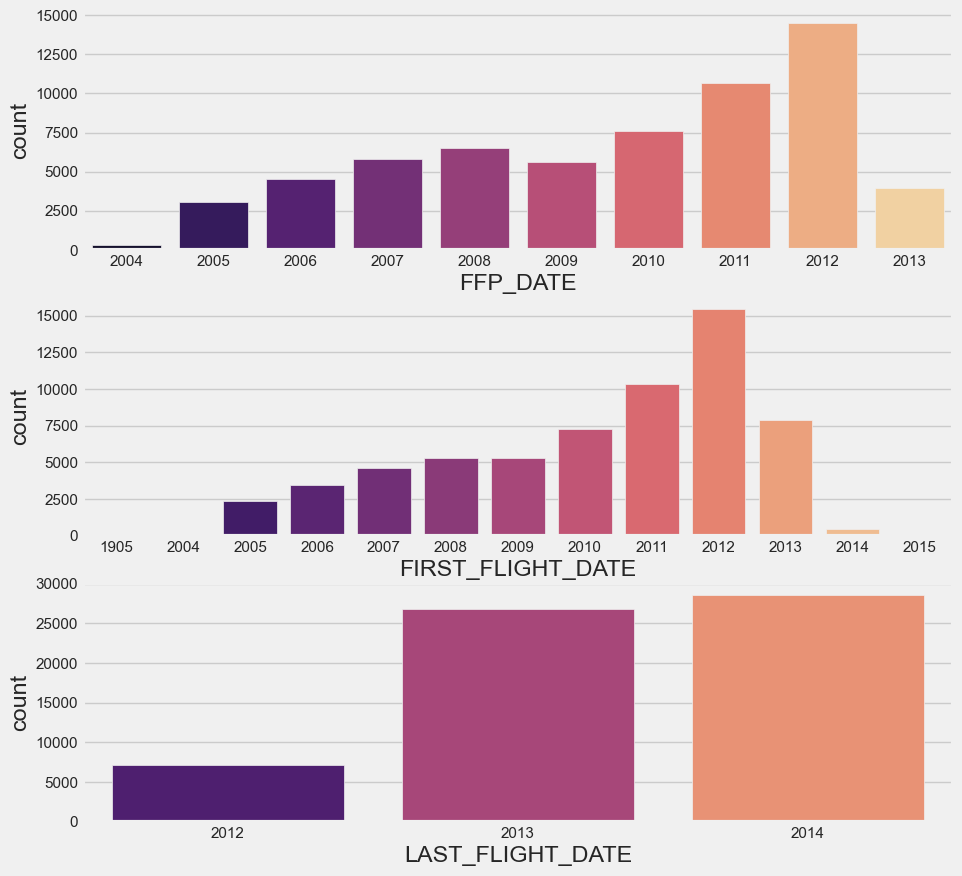

In [20]:
ffp = pd.to_datetime(df["FFP_DATE"]).dt.year
firstflight = pd.to_datetime(df["FIRST_FLIGHT_DATE"]).dt.year
lastflight = pd.to_datetime(df["LAST_FLIGHT_DATE"]).dt.year

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.countplot(x=ffp, ax=ax[0], palette="magma")
sns.countplot(x=firstflight, ax=ax[1], palette="magma")
sns.countplot(x=lastflight, ax=ax[2], palette="magma" )
plt.show()

<b>Insights:<b><br>
1. Member mayoritas bekerja di CN (China), di provinsi Guang Dong, dan kota Guang Zhou.
1. Pada FIRST_FLIGHT_DATE terdapat value yang sangat jauh berbeda dengan values lainya yaitu tahun 1905.
2. Total pendaftaran member terbanyak ada di tahun 2012.
3. Penerbangan pertama dari member airlines juga ada di tahun 2012.

# Multivariate Analysis

<Axes: >

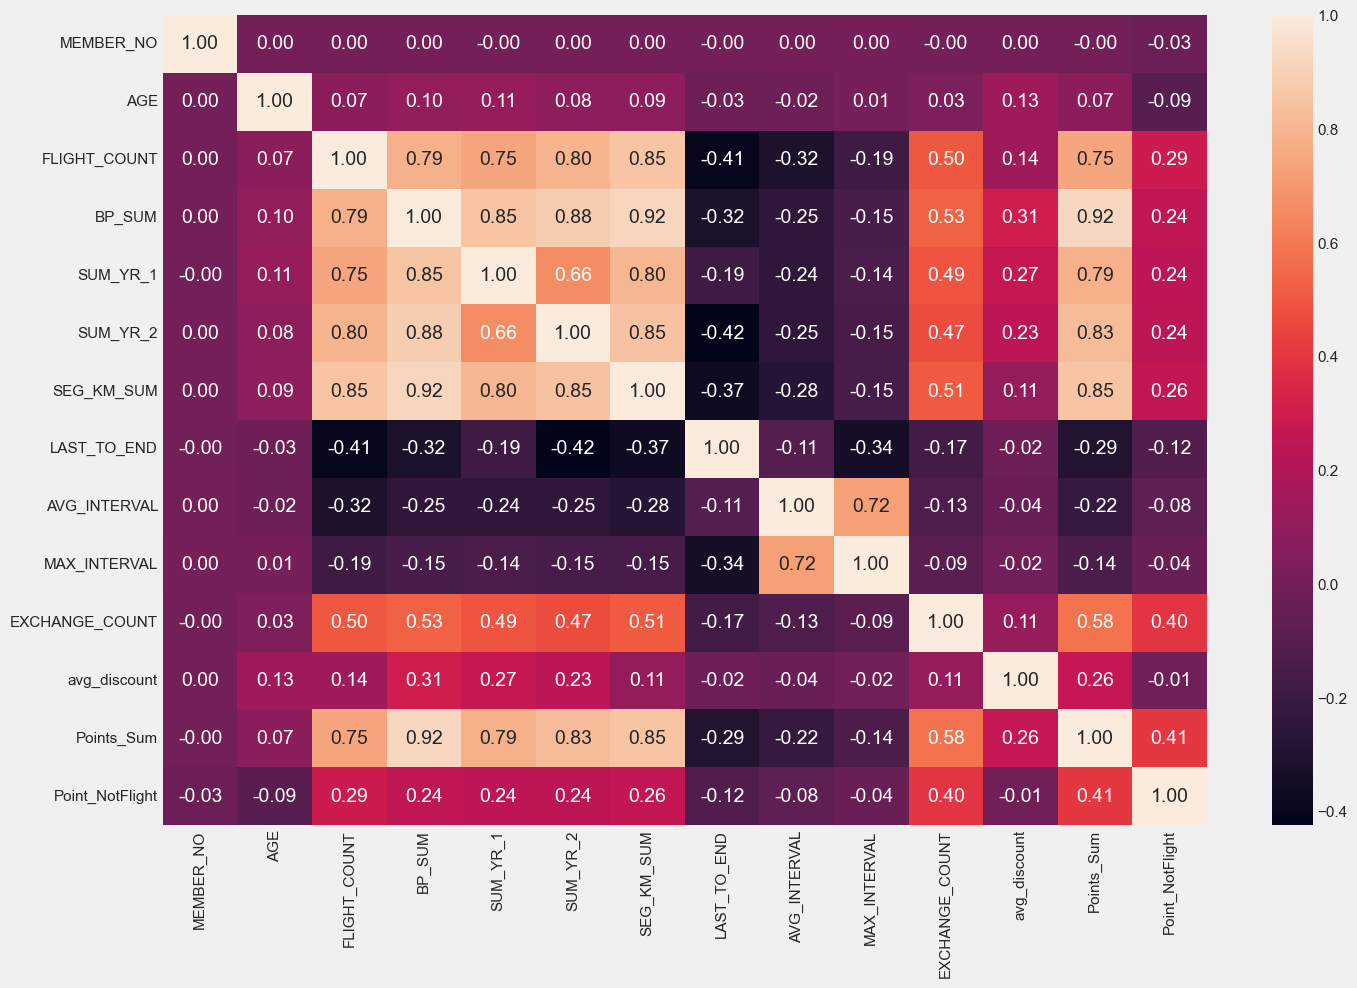

In [21]:
# Create heatmap to see corelation between numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical].corr(), annot=True, fmt='.2f')

### Insights:<br>
1. FFP_TIER memiliki korelasi positif kuat dengan Points_Sum, SEG_KM_SUM, SUM_YR_2, BP_SUM, dan FLIGHT_COUNT.
2. AGE tidak memiliki korelasi kuat dengan fitur apapun.
3. FLIGHT_COUNT memiliki korelasi positive kuat dengan Points_Sum, EXCHANGE_COUNT, SEG_KM_SUM, SUM_YR_1, SUM_YR_2, dan BP_SUM.
4. Terdapat kemungkinan redundansi antara BP_SUM dengan Points_Sum dan SEG_KM_SUM. BP_SUM memiliki korelasi positive kuat dengan EXCHANGE_COUNT, SUM_YR_1, dan SUM_YR_2.
5. SUM_YR_1 memiliki korelasi positive kuat dengan Points_Sum, SEG_KM_SUM, dan SUM_YR_2.
6. SUM_YR_2 memiliki korelasi positive kuat dengan Points_Sum, dan SEG_KM_SUM.
7. SEG_KM_SUM memiliki korelasi positif kuat dengan Points_Sum dan EXCHANGE_COUNT.
8. AVG_INTERVAL memiliki korelasi positif kuat dengan MAX_INTERVAL.
8. EXCHANGE_COUNT memiliki korelasi positif kuat dengan Points_Sum.


<Figure size 1500x1500 with 0 Axes>

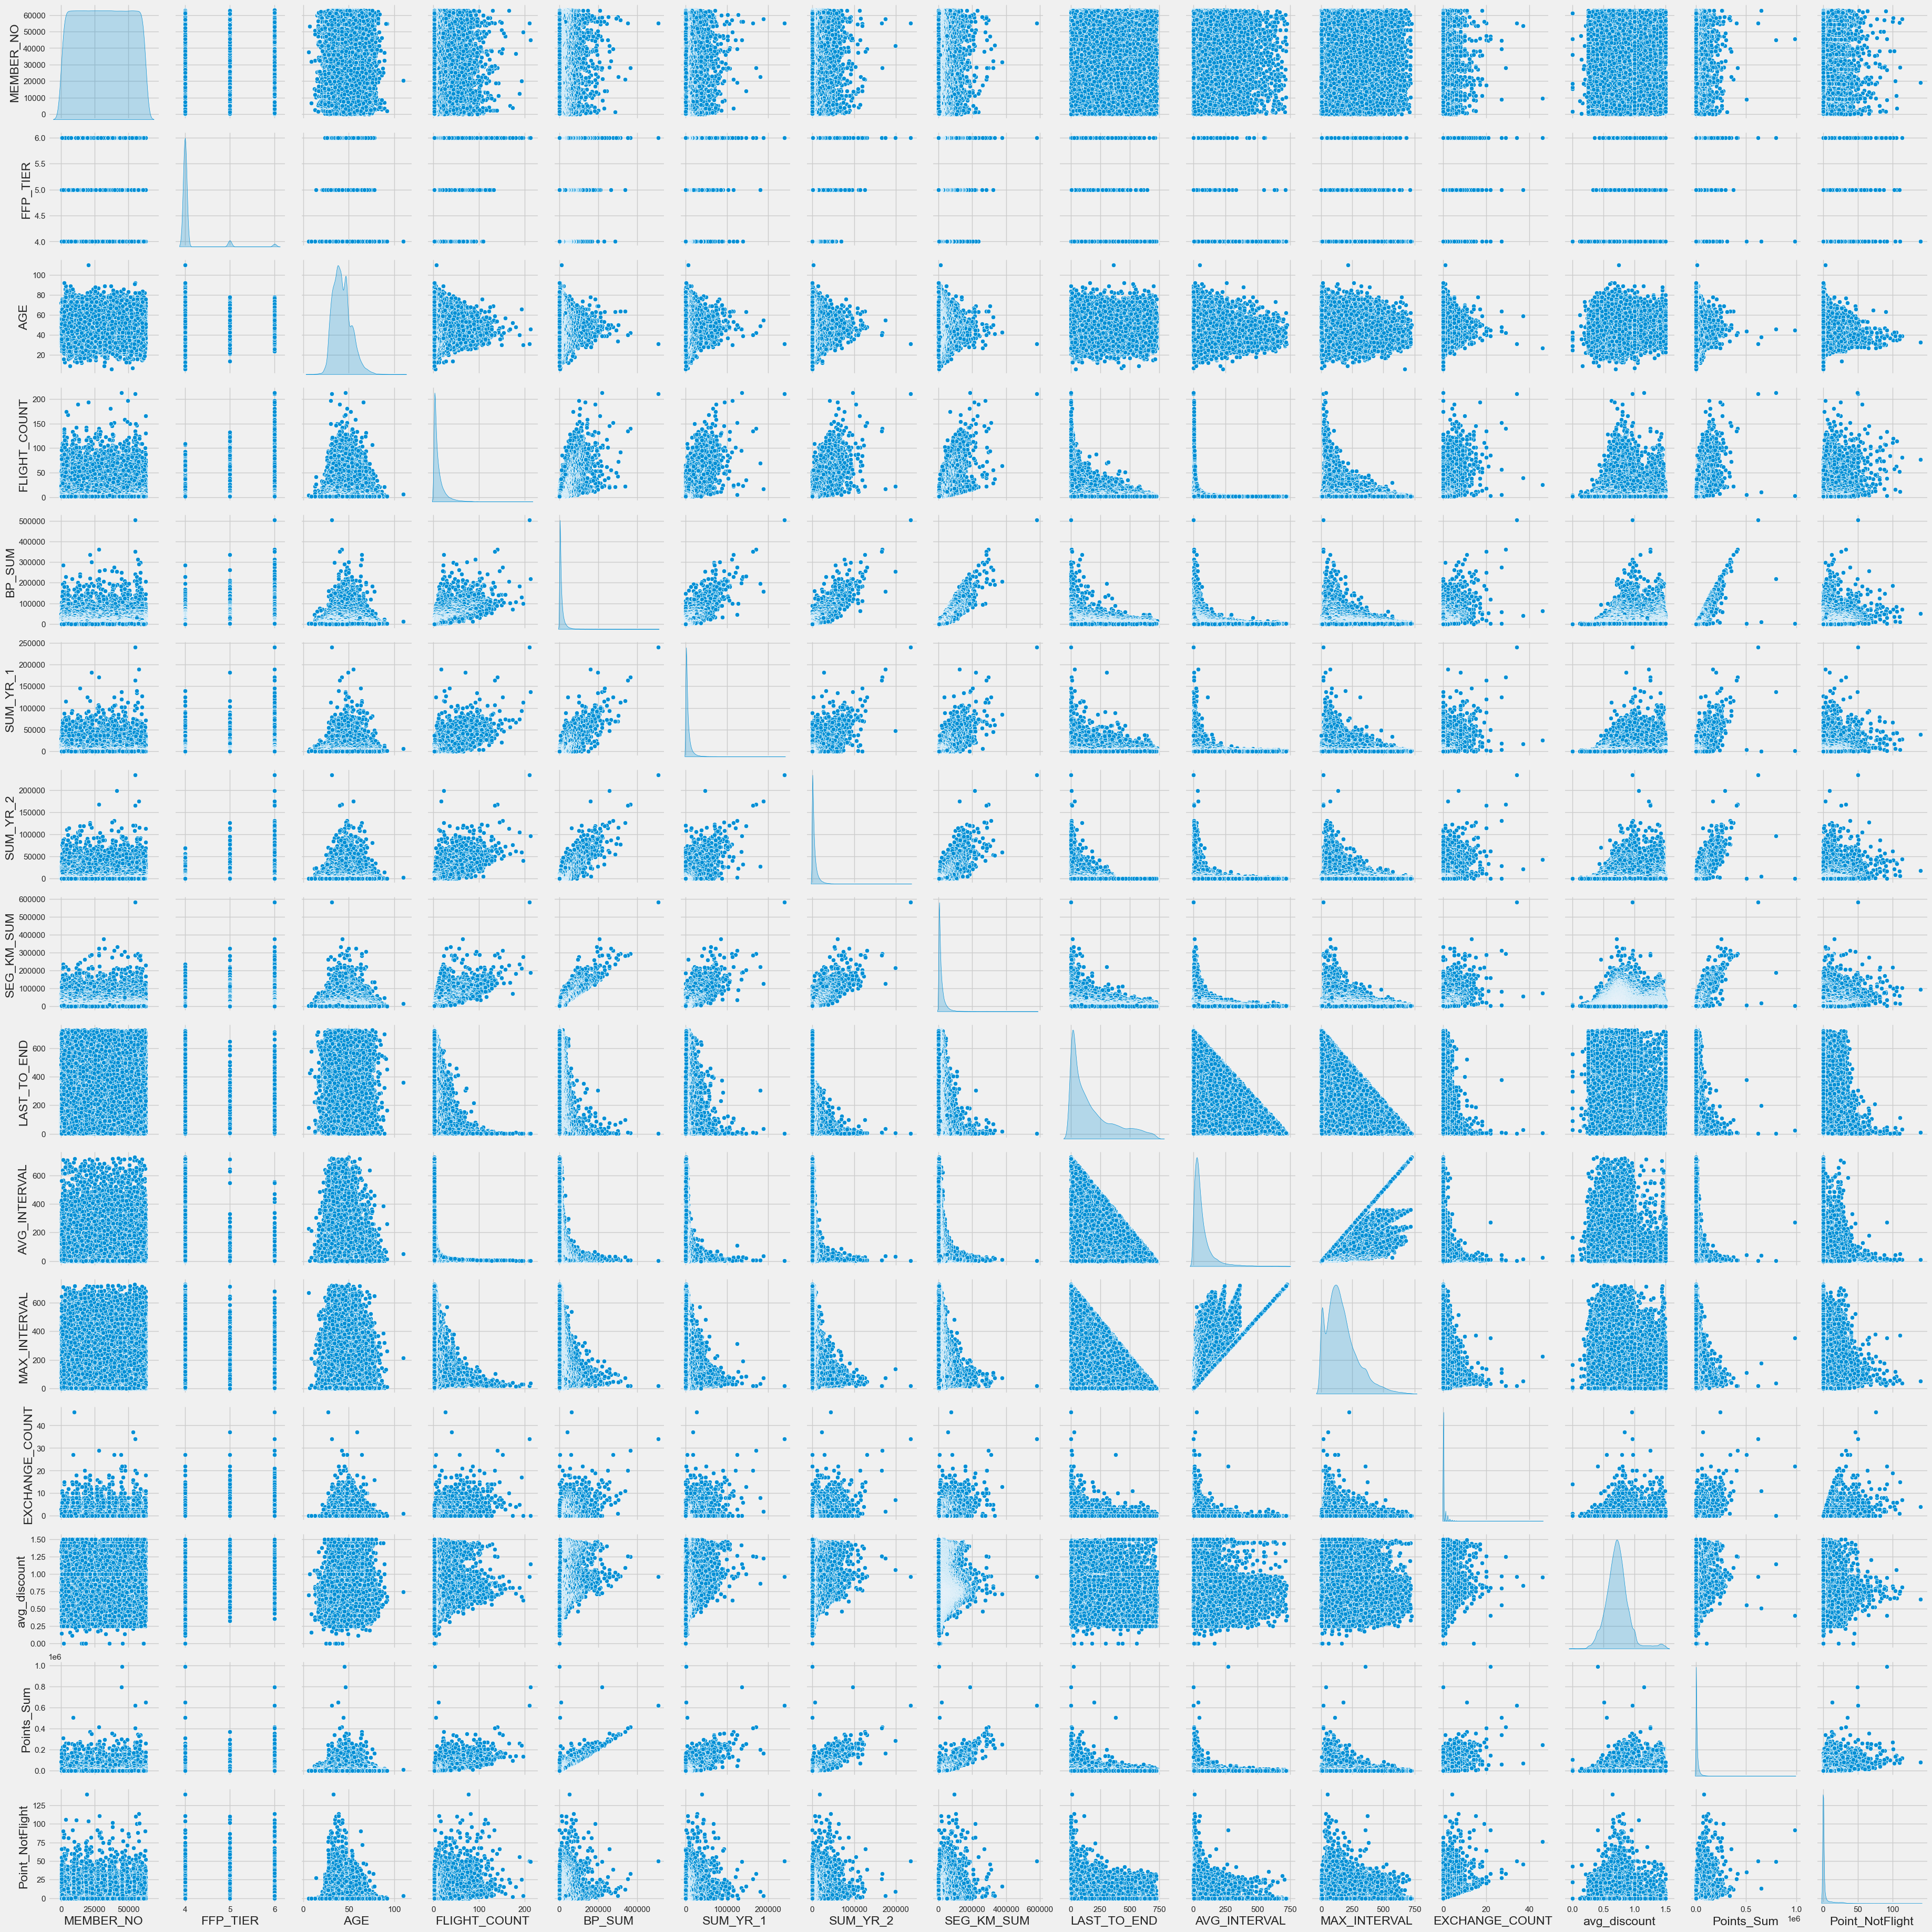

In [22]:
# Create a pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

## Insights:
1. Terdapat hubungan linear pada beberpa kolom

# Data Pre-Processing


### Handling Missing Values

In [23]:
# Calculate the number of missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print(missing_data)

                   Missing Values  Percentage
MEMBER_NO                       0    0.000000
FFP_DATE                        0    0.000000
FIRST_FLIGHT_DATE               0    0.000000
GENDER                          3    0.004795
FFP_TIER                        0    0.000000
WORK_CITY                    2255    3.604136
WORK_PROVINCE                3226    5.156073
WORK_COUNTRY                   25    0.039957
AGE                           419    0.669682
LOAD_TIME                       0    0.000000
FLIGHT_COUNT                    0    0.000000
BP_SUM                          0    0.000000
SUM_YR_1                      551    0.880656
SUM_YR_2                      138    0.220564
SEG_KM_SUM                      0    0.000000
LAST_FLIGHT_DATE                0    0.000000
LAST_TO_END                     0    0.000000
AVG_INTERVAL                    0    0.000000
MAX_INTERVAL                    0    0.000000
EXCHANGE_COUNT                  0    0.000000
avg_discount                    0 

In [24]:
df_clean = df.copy() 

# Impute rows with mode & mean
df_clean['WORK_CITY'].fillna(df_clean['WORK_CITY'].mode()[0], inplace=True)
df_clean['WORK_PROVINCE'].fillna(df_clean['WORK_PROVINCE'].mode()[0], inplace=True)
df_clean['WORK_COUNTRY'].fillna(df_clean['WORK_COUNTRY'].mode()[0], inplace=True)
df_clean['GENDER'].fillna(df_clean['GENDER'].mode()[0], inplace=True)

df_clean['AGE'].fillna(df_clean['AGE'].mean(), inplace=True)
df_clean['SUM_YR_1'].fillna(df_clean['SUM_YR_1'].mean(), inplace=True)
df_clean['SUM_YR_2'].fillna(df_clean['SUM_YR_2'].mean(), inplace=True)

# Check missing values
df_clean.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

# Feature Engineering

In [25]:
# Change date columns from object to datetime
df_clean['FFP_DATE'] = pd.to_datetime(df_clean['FFP_DATE'])
df_clean['LOAD_TIME'] = pd.to_datetime(df_clean['LOAD_TIME'])

In [26]:
# Extract loyalty / membership duration from FFP_DATE - LOAD_TIME (in months)
df_clean['LOYALTY'] = (df_clean['LOAD_TIME'].dt.year - df_clean['FFP_DATE'].dt.year) * 12 + (df_clean['LOAD_TIME'].dt.month - df_clean['FFP_DATE'].dt.month)

# Display the first few rows to check
print(df_clean[['FFP_DATE', 'LOAD_TIME', 'LOYALTY']].sample(5))




        FFP_DATE  LOAD_TIME  LOYALTY
27080 2012-03-13 2014-03-31       24
4360  2006-04-08 2014-03-31       95
39616 2012-05-09 2014-03-31       22
39964 2011-12-28 2014-03-31       27
42998 2007-04-28 2014-03-31       83


<Axes: >

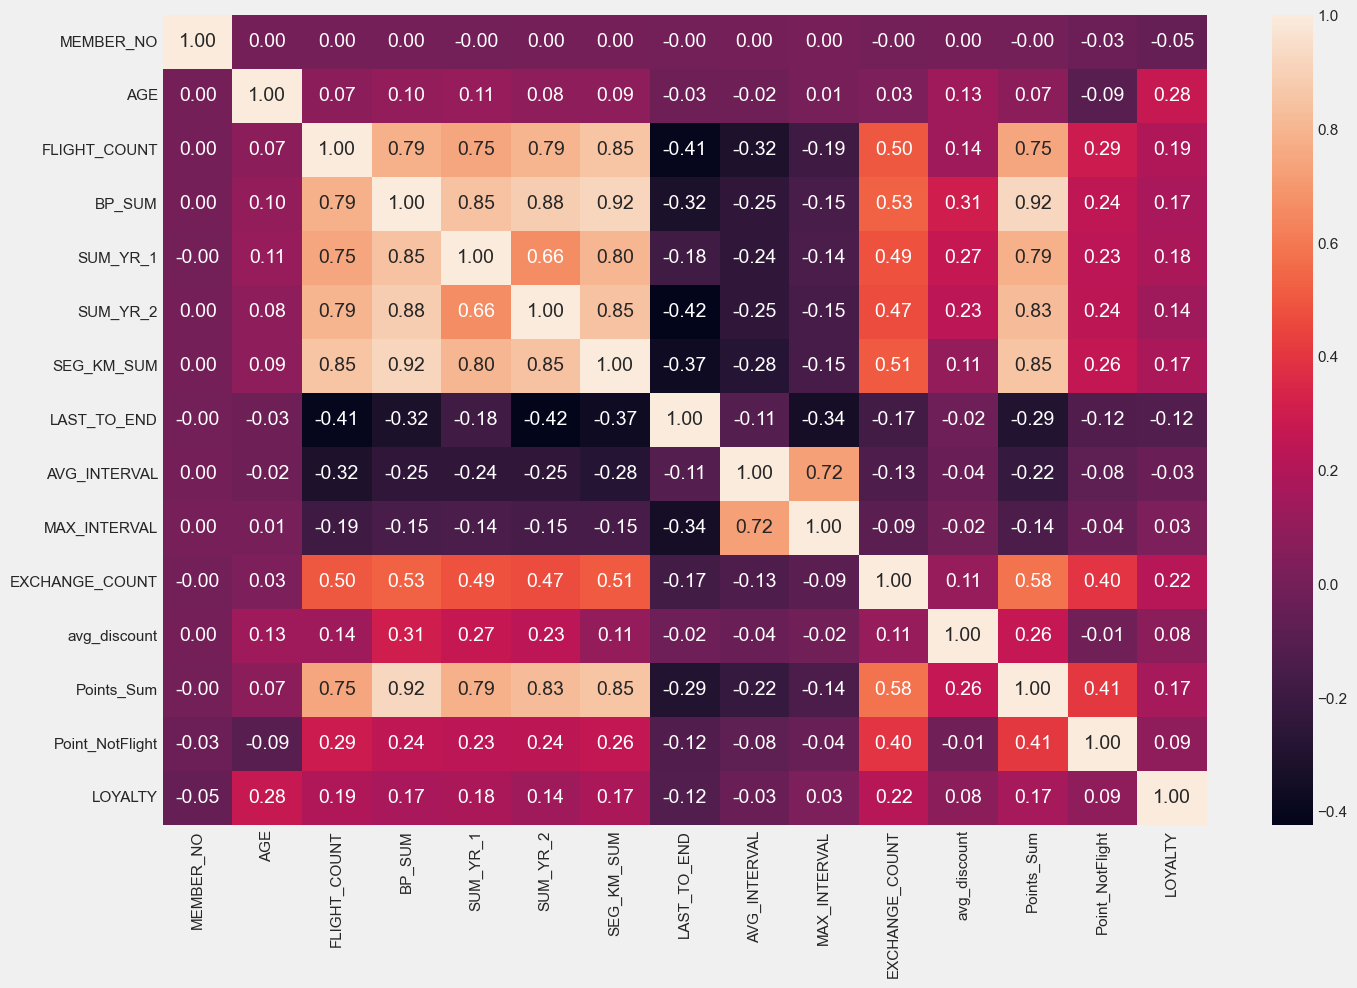

In [27]:
# Create heatmap to see corelation between numerical features after being cleaned

nums = ['MEMBER_NO', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 
        'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight', 'LOYALTY']
plt.figure(figsize=(15, 10))
sns.heatmap(df_clean[nums].corr(), annot=True, fmt='.2f')

# Feature Selection

Tujuan utama dalam mengklasifikasikan pelanggan berdasarkan karakteristik mereka dalam beberapa dimensi yang penting bagi bisnis untuk memahami dan mengelola interaksi dengan pelanggan. Dari landasan tersebut, berikut fitur yang dipilih untuk clustering:

Fitur "LOYALTY" merepresentasikan Lenght: Jangka waktu keanggotaan pelanggan dari pertama kali mendaftar hingga periode observasi (semakin lama pelanggan menjadi anggota berarti pelanggan "loyal" atau semakin baik).<br>

Fitur "AVG_INTERVAL" merepresentasikan interval: Jangka waktu antara penerbangan (semakin kecil berarti pelanggan baru saja melakukan penerbangan, oleh karena itu semakin kecil semakin baik).<br>

Fitur "FLIGHT_COUNT" merepresentasikan Frequency: Jumlah penerbangan pelanggan dalam periode observasi (semakin besar semakin baik yang berarti pelanggan sering melakukan penerbangan).<br>

Fitur "SEG_KM_SUM" merepresentasikan jarak tempuh: Jumlah jarak yang ditempuh selama periode observasi (semakin jauh jarak tempuhnya maka akan semakin besar biaya yang dibayarkan oleh customer). <br>



# Handling Outlier

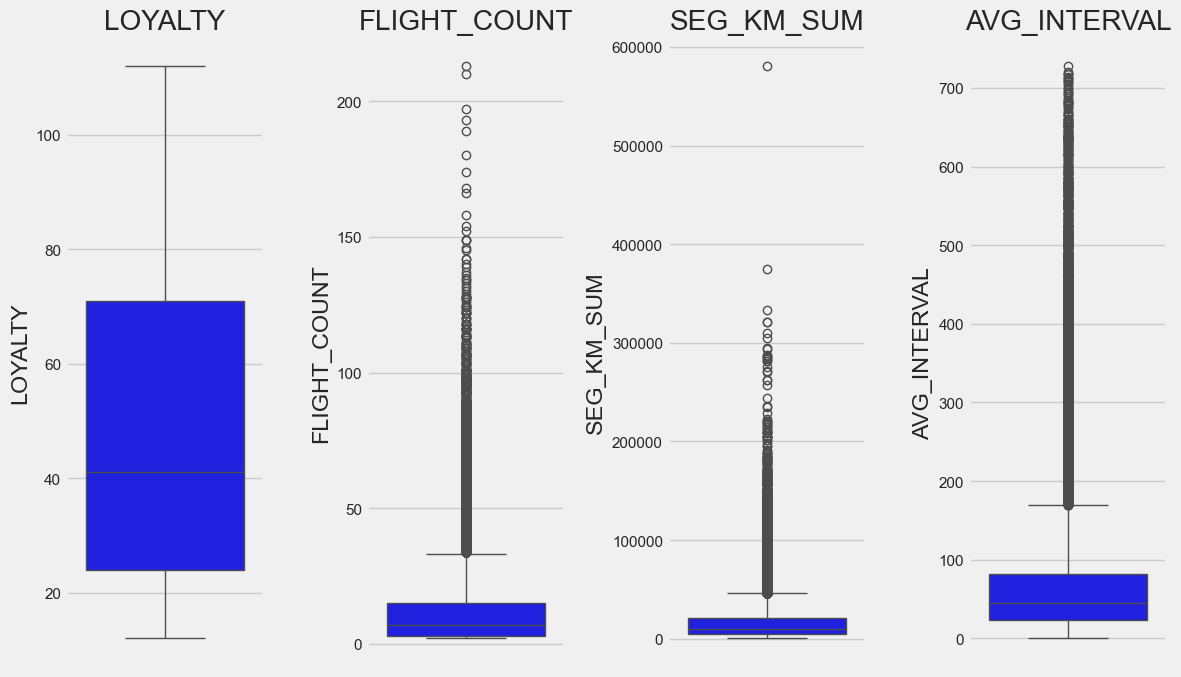

In [28]:
# Create boxplot to see outliers distribution before removing outliers
X_columns = ['LOYALTY', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']

plt.figure(figsize=(15, 7))
for i in range(0, len(X_columns)):
    plt.subplot(1, 5, i+1)  # Adjusted to fit 16 plots
    sns.boxplot(y=df_clean[X_columns[i]], color='blue')
    plt.title(X_columns[i])
    plt.tight_layout()
plt.show()

insight: fitur 'FLIGHT_COUNT', 'SEG_KM_SUM', dan 'AVG_INTERVAL' terlihat memiliki outliers akan ditangani dengan metode IQR.

##### IQR Method

In [29]:
iqr_columns = ['FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']
       
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the specified columns using the IQR method and update df_clean
df_clean = remove_outliers_iqr(df_clean, iqr_columns)

# Display the shape of the dataframe after removing outliers
print("Shape of dataframe after removing outliers:", df_clean.shape)

Shape of dataframe after removing outliers: (51092, 24)


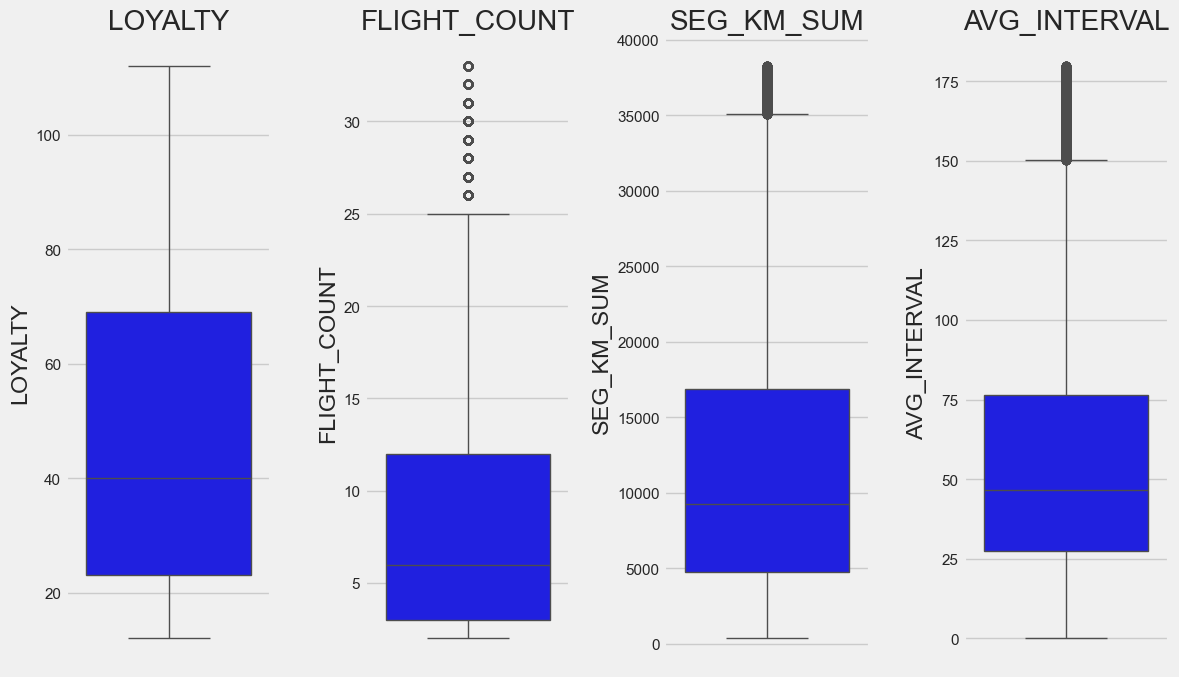

In [30]:
# Create boxplot to see outliers distribution before removing outliers
X_columns = ['LOYALTY', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']

plt.figure(figsize=(15, 7))
for i in range(0, len(X_columns)):
    plt.subplot(1, 5, i+1)  # Adjusted to fit 16 plots
    sns.boxplot(y=df_clean[X_columns[i]], color='blue')
    plt.title(X_columns[i])
    plt.tight_layout()
plt.show()

# Standardization

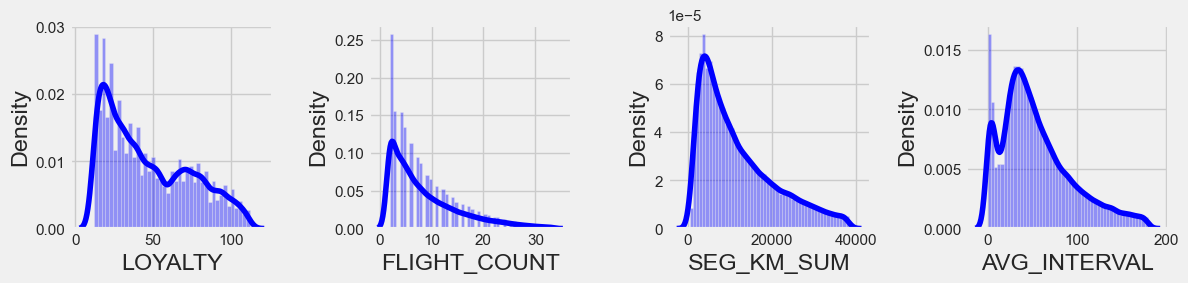

In [31]:
# Create distplot to see distribution
plt.figure(figsize=(15, 8))
for i in range(0, len(X_columns)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df_clean[X_columns[i]], color = 'blue')
    plt.tight_layout()
plt.show()

In [32]:
X_columns = ['LOYALTY', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']

X = df_clean[X_columns].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd. DataFrame (data = X_std, columns = X_columns)
new_df.describe ()

LOYALTY  FLIGHT_COUNT    SEG_KM_SUM  AVG_INTERVAL
count  5.109200e+04  5.109200e+04  5.109200e+04  5.109200e+04
mean   1.290581e-16  1.468592e-16  1.068067e-16  6.675419e-18
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00
min   -1.274378e+00 -9.902221e-01 -1.296830e+00 -1.386544e+00
25%   -8.732420e-01 -8.394407e-01 -7.984114e-01 -7.035152e-01
50%   -2.533042e-01 -3.870966e-01 -2.951925e-01 -2.245623e-01
75%    8.042366e-01  5.175916e-01  5.704050e-01  5.251031e-01
max    2.372314e+00  3.684000e+00  2.983043e+00  3.105202e+00

# Clustering

### Elbow Method

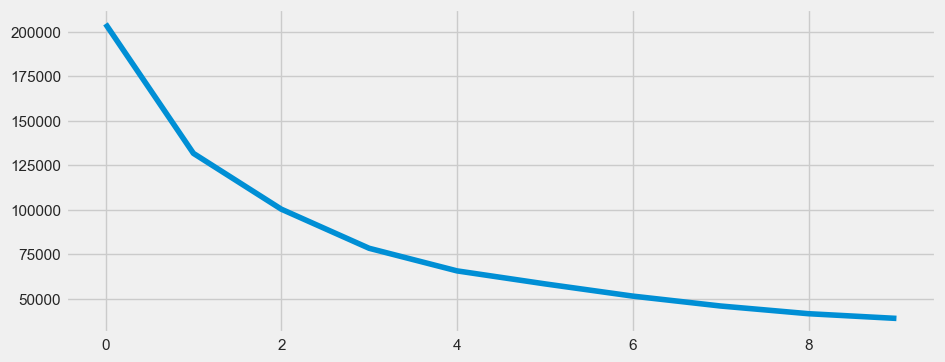

In [33]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans (n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(new_df.values)
    inertia.append(kmeans.inertia_)

    
plt.figure(figsize=(10, 4))
plt.plot (inertia)

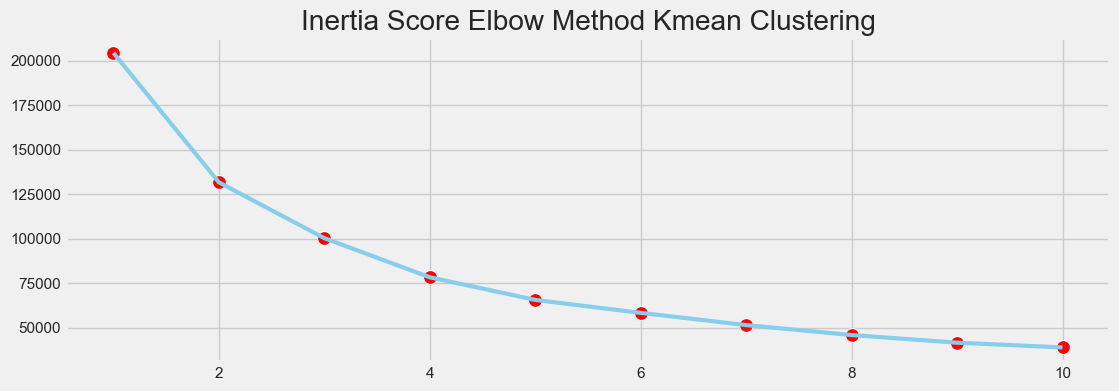

In [34]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x=range(1, 11), y=inertia, color="skyblue", linewidth = 3)
sns.scatterplot(x=range(1, 11), y=inertia, s=100, color='red')
plt.title("Inertia Score Elbow Method Kmean Clustering")

plt.show()

Dari Elbow graph diatas terlihat bahwa setelah titik ke 4 (k=5), pengurangan inertia mulai kurang signifikan, untuk lebih pastinya lagi makan kita akan melihat pengurangan setiap step n-clusters

In [35]:
pd.Series(inertia) - pd.Series(inertia).shift(-1)

0    72751.092763
1    31358.341623
2    21984.143451
3    12697.032312
4     7292.680991
5     6878.838136
6     5563.468063
7     4322.392092
8     2641.074509
9             NaN
dtype: float64

Berdasarkan perhitungan pengurangan, titik 4 (k = 5) terlihat sebagai pilihan yang masuk akal karena setelah k = 5, penurunan inertia menjadi kurang signifikan.
Oleh karena itu, k = 5 tampaknya menjadi titik optimal untuk pengelompokan berdasarkan analisis diatas.



## K-Means Clustering 

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(new_df.values)
# Add cluster labels to the dataframe
new_df['Cluster'] = kmeans.labels_

In [37]:
new_df.sample(10)

LOYALTY  FLIGHT_COUNT  SEG_KM_SUM  AVG_INTERVAL  Cluster
50765 -1.237911     -0.990222   -1.155425     -1.386544        0
21159 -1.274378      0.366810   -0.055922     -0.546918        3
30208  0.621902     -0.839441   -0.951337     -0.699350        0
43414  0.950104     -0.839441   -0.894300      2.799088        1
10357 -1.274378      0.668373    1.190972     -0.813883        3
7713   1.023038      1.271498    1.546969     -0.501001        4
18930  0.038431     -0.387097   -0.213365      0.107789        3
43582 -0.654440     -0.688659   -0.720706      2.778264        1
11048 -0.070970      0.517592    0.680129     -0.007614        3
29961 -0.472106     -0.387097   -0.439478      0.677535        1

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)

pca.fit(new_df)
pcs = pca.transform(new_df)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2', 'PC 3'])
data_pca['ClusterPCA'] = new_df['Cluster']
data_pca.sample(5)

PC 1      PC 2      PC 3  ClusterPCA
16877  1.242475  0.385077 -0.067851           3
10717  3.159935 -0.416722  0.194992           4
40834 -2.197166 -1.749876 -0.477272           0
10672  0.629501  0.551740 -0.332424           2
3666   3.155906  0.545395 -0.676279           4

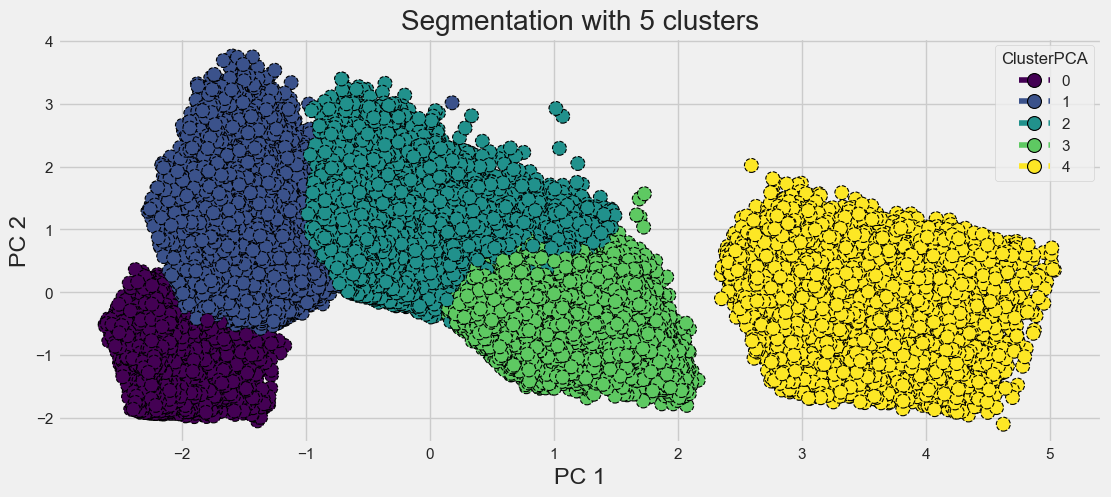

In [39]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="ClusterPCA", data=data_pca, edgecolor='black', linestyle='--',
                palette='viridis', ax=ax, s = 100)
plt.title("Segmentation with 5 clusters")
plt.show()

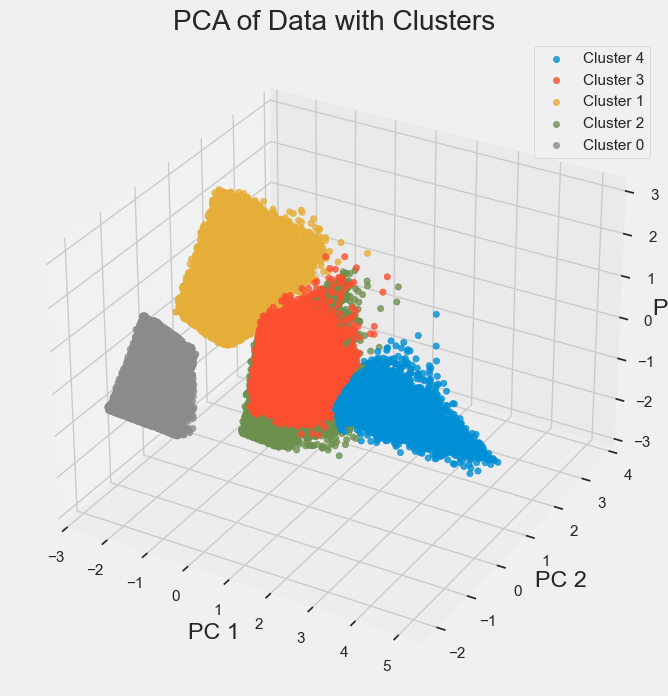

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
for cluster in data_pca['ClusterPCA'].unique():
    ax.scatter(data_pca.loc[data_pca['ClusterPCA'] == cluster, 'PC 1'],
               data_pca.loc[data_pca['ClusterPCA'] == cluster, 'PC 2'],
               data_pca.loc[data_pca['ClusterPCA'] == cluster, 'PC 3'],
               label=f'Cluster {cluster}',
               alpha=0.8)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA of Data with Clusters')
ax.legend()
plt.show()

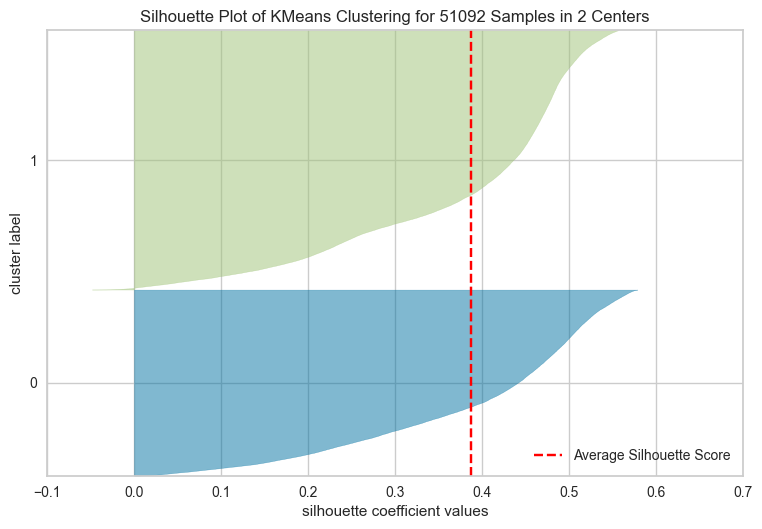

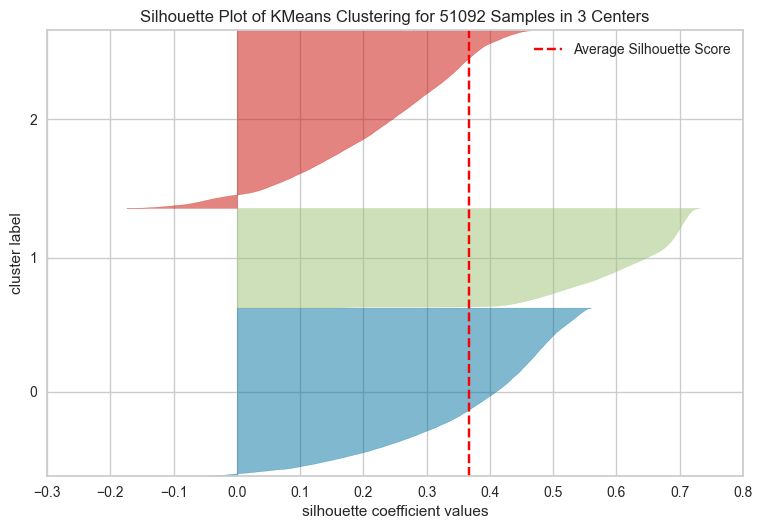

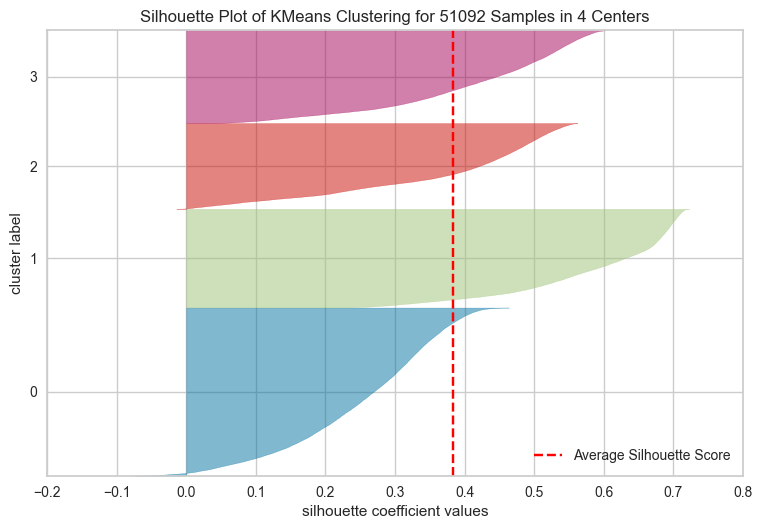

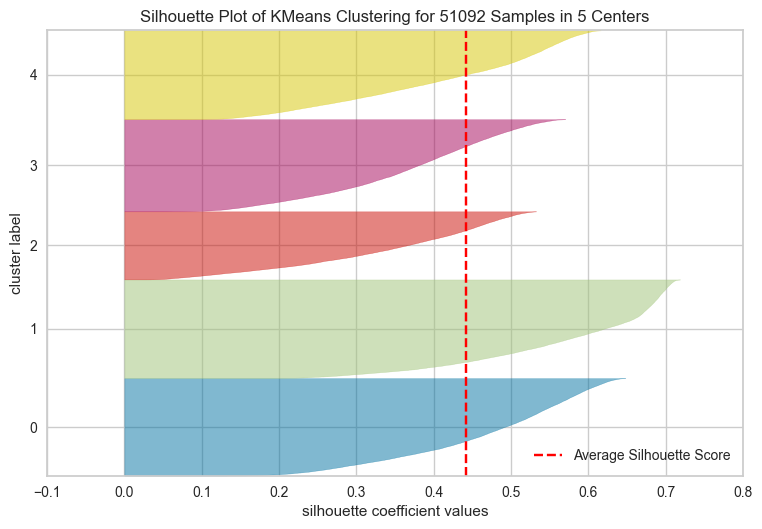

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

for i in [2,3,4,5]:
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(new_df)        
    visualizer.show()

In [42]:
# Add cluster to selected features
df_analysis = df_clean[X_columns]

df_analysis['Cluster'] = kmeans.labels_
display(df_analysis.groupby('Cluster').agg(['median','mean']))

LOYALTY            FLIGHT_COUNT            SEG_KM_SUM                \
         median       mean       median       mean     median          mean   
Cluster                                                                       
0          26.0  29.892255          3.0   3.355030     4154.0   4640.195973   
1          34.0  39.231056          4.0   4.424566     5767.0   6379.370846   
2          81.0  82.548088          6.0   6.860470     8966.5   9650.857062   
3          28.0  30.089691         10.0  10.780239    14805.5  15549.482401   
4          56.0  57.752113         20.0  20.671831    27018.0  27121.329449   

        AVG_INTERVAL              
              median        mean  
Cluster                           
0          17.666667   24.365179  
1         112.750000  117.146102  
2          53.909091   53.673027  
3          48.384615   49.257936  
4          30.529825   31.450300

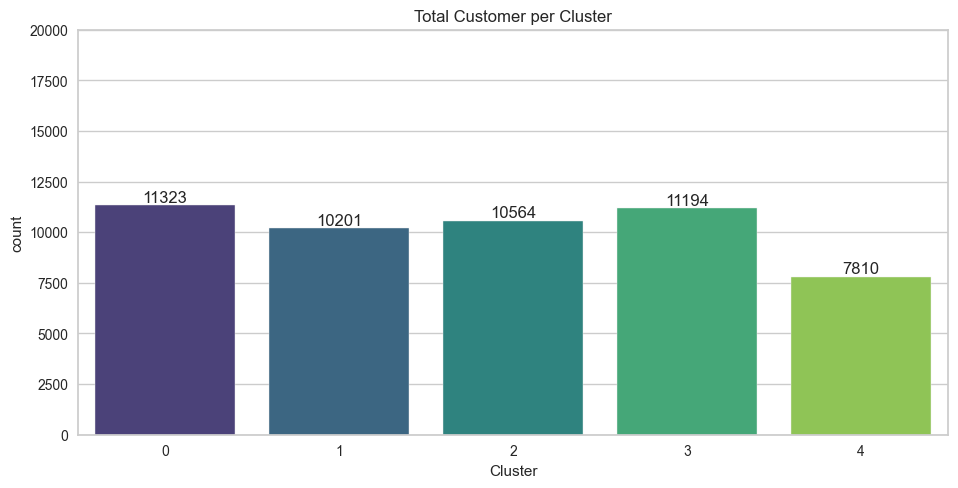

In [43]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_analysis, x="Cluster", palette="viridis")

# Tambahkan label pada setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.ylim(0, 20000)
plt.title("Total Customer per Cluster")
plt.xlabel("Cluster")
plt.show()

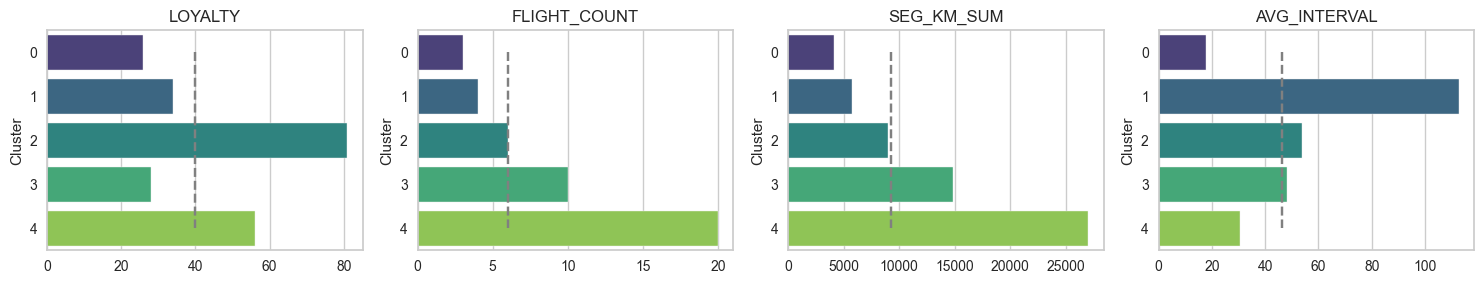

In [44]:
# Observe the value of each feature in each cluster

plt.figure(figsize=(15,3))
for i in range(len(X_columns)):
    plt.subplot(1, len(X_columns), i+1)
    plt.vlines(df_analysis[X_columns[i]].median(), ymin=0, ymax=4, color='grey', linestyle='--')
    group = df_analysis.groupby('Cluster')
    index = group[X_columns[i]].median().index
    value = group[X_columns[i]].median().values
    sns.barplot(y = index, x = value, orient='h', palette='viridis')
    plt.title(X_columns[i])

plt.tight_layout()
plt.show()

# Business Insight and Recomendations:

### Penjelasan Cluster Berdasarkan Karakteristik Pelanggan:

1. **Cluster 0 (_Inexperienced Flyers_):**
   - Pelanggan dalam cluster ini adalah anggota baru dari program maskapai.
   - Mereka belum melakukan banyak penerbangan, meskipun interval rata-rata antar penerbangan mereka singkat.
   - Pelanggan dalam cluster ini mungkin termasuk individu yang baru mulai menjelajahi atau menggunakan layanan penerbangan, seperti mahasiswa atau orang-orang yang baru memulai karir profesional.

2. **Cluster 1 (_Rare Flyers_):**
   - Pelanggan dalam cluster ini sudah menjadi anggota lebih lama daripada Cluster 0, namun jumlah penerbangan dan jarak yang mereka tempuh masih sedikit.
   - Interval rata-rata antar penerbangan mereka paling tinggi di antara cluster lainnya, menunjukkan bahwa mereka jarang melakukan penerbangan.
   - Pelanggan dalam cluster ini mungkin terdiri dari individu yang hanya melakukan perjalanan pribadi atau liburan jangka panjang yang jarang terbang, atau mereka yang memilih untuk menggunakan moda transportasi lain.

3. **Cluster 2 (_Infrequent Flyers_):**
   - Pelanggan dalam cluster ini merupakan yang paling lama menjadi anggota dibandingkan dengan cluster lainnya.
   - Meskipun durasi keanggotaannya lama, mereka masih melakukan penerbangan dengan jumlah dan jarak yang tergolong sedikit.
   - Interval rata-rata antar penerbangan mereka moderat, menunjukkan bahwa mereka melakukan perjalanan secara sporadis atau hanya pada kesempatan tertentu.
   - Pelanggan dalam cluster ini mungkin terdiri dari individu yang lebih memilih untuk bepergian hanya pada waktu-waktu khusus, seperti liburan tahunan atau perjalanan bisnis yang jarang.

4. **Cluster 3 (_Regular Flyers_):**
   - Pelanggan dalam cluster ini adalah yang baru-baru ini menjadi anggota, tetapi mereka melakukan penerbangan dengan jumlah yang lebih banyak dibandingkan dengan rata-rata.
   - Total jarak yang mereka tempuh juga cukup signifikan.
   - Interval rata-rata antar penerbangan mereka moderat, menunjukkan bahwa mereka melakukan perjalanan secara teratur, mungkin untuk kepentingan bisnis atau pekerjaan.
   - Pelanggan dalam cluster ini mungkin terdiri dari pebisnis atau profesional yang melakukan perjalanan rutin untuk pertemuan bisnis atau pekerjaan.

5. **Cluster 4 (_Frequent Flyers_):**
   - Pelanggan dalam cluster ini adalah yang paling lama menjadi anggota kedua setelah Cluster 2.
   - Mereka melakukan jumlah penerbangan dan total jarak tempuh yang paling tinggi dibandingkan dengan cluster lainnya.
   - Interval rata-rata antar penerbangan mereka singkat, menunjukkan bahwa mereka sering melakukan perjalanan udara.
   - Pelanggan dalam cluster ini mungkin terdiri dari eksekutif bisnis yang sering melakukan perjalanan internasional atau nasional, atau mungkin pelancong yang sering bepergian untuk liburan atau kegiatan rekreasi lainnya.


### Rekomendasi Bisnis untuk Setiap Cluster:

1. **Cluster 0 (_Inexperienced Flyers_):**
   - **Rekomendasi Bisnis:** Berikan penawaran khusus untuk memikat pelanggan baru, seperti diskon untuk penerbangan pertama mereka atau poin bonus saat mendaftar. Fokuskan pada layanan yang mudah dipahami dan jangan terlalu rumit karena mereka baru mengenal layanan penerbangan.

2. **Cluster 1 (_Rare Flyers_):**
   - **Rekomendasi Bisnis:** Tawarkan paket liburan jangka panjang atau promosi spesial untuk destinasi tertentu yang jarang dikunjungi. Berikan fleksibilitas dalam reservasi dan penawaran istimewa untuk meningkatkan minat mereka dalam bepergian lebih sering.

3. **Cluster 2 (_Infrequent Flyers_):**
   - **Rekomendasi Bisnis:** Buat program loyalitas yang menarik dengan poin atau penghargaan yang dapat dikumpulkan dari setiap penerbangan. Tawarkan paket liburan atau kebijakan fleksibel yang memungkinkan mereka merencanakan perjalanan jangka panjang atau liburan secara efektif.

4. **Cluster 3 (_Regular Flyers_):**
   - **Rekomendasi Bisnis:** Fokuskan pada layanan premium dan keuntungan bisnis yang cepat, seperti akses prioritas, lounge bandara eksklusif, atau pelayanan pelanggan yang unggul. Tawarkan program loyalitas yang memberikan nilai tambah dan kenyamanan bagi pelanggan yang sering melakukan perjalanan.

5. **Cluster 4 (_Frequent Flyers_):**
   - **Rekomendasi Bisnis:** Tingkatkan layanan eksklusif untuk pelanggan yang sering terbang, seperti upgrade otomatis, akses lounge VIP global, atau kesempatan eksklusif untuk pengalaman perjalanan yang lebih mewah. Tawarkan kebijakan fleksibel yang mengakomodasi perjalanan sering mereka.

